In [5]:
from __future__ import print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

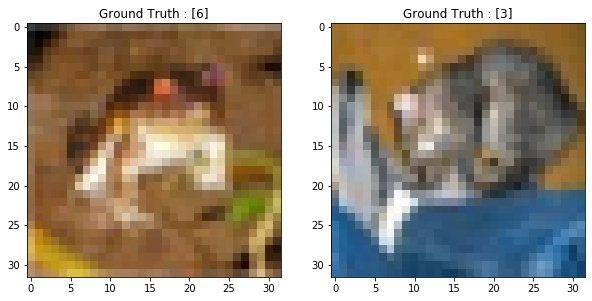

In [6]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [14]:
import datetime
datetime.datetime.now()

datetime.datetime(2019, 9, 10, 14, 45, 25, 963170)

In [7]:
# change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [8]:
train_data.shape

(50000, 3072)

In [9]:
# change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [10]:
# change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(dimData,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [12]:
# for a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
start = datetime.datetime.now()

In [22]:
history = model.fit(train_data, train_labels_one_hot, batch_size=32, epochs=10, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot),
                   shuffle = True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 41s 820us/step - loss: 1.6060 - acc: 0.4325 - val_loss: 1.6007 - val_acc: 0.4364
Epoch 2/10
50000/50000 [==============================] - 41s 821us/step - loss: 1.5951 - acc: 0.4364 - val_loss: 1.5585 - val_acc: 0.4646
Epoch 3/10
50000/50000 [==============================] - 41s 815us/step - loss: 1.5936 - acc: 0.4358 - val_loss: 1.6921 - val_acc: 0.4149
Epoch 4/10
50000/50000 [==============================] - 41s 821us/step - loss: 1.5857 - acc: 0.4423 - val_loss: 1.6436 - val_acc: 0.4301
Epoch 5/10
50000/50000 [==============================] - 41s 820us/step - loss: 1.5862 - acc: 0.4421 - val_loss: 1.7999 - val_acc: 0.3781
Epoch 6/10
50000/50000 [==============================] - 41s 814us/step - loss: 1.5833 - acc: 0.4421 - val_loss: 1.6506 - val_acc: 0.4155
Epoch 7/10
50000/50000 [==============================] - 41s 823us/step - loss: 1.5808 - acc: 0.4419 - val_loss: 1.

In [23]:
end = datetime.datetime.now()
diff_time = end - start
print(diff_time)

0:06:49.881671


In [24]:
# save model and weights

model.save('keras_cifar10_trained_model-v2.h5')

# score trained model.
scores = model.evaluate(test_data, test_labels_one_hot, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 104us/step
Test loss: 1.6056807355880738
Test accuracy: 0.4346


Text(0.5, 1.0, 'Accuracy Curves')

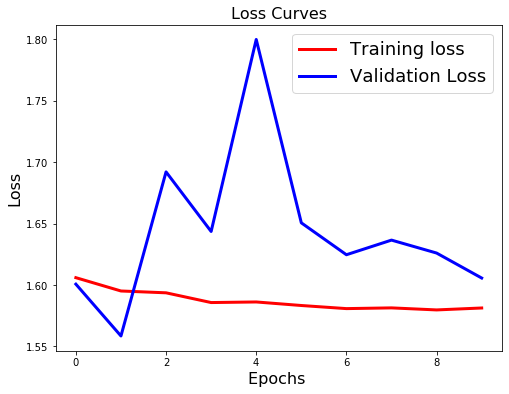

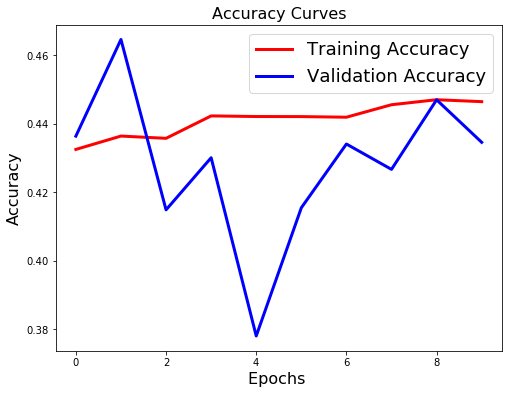

In [25]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)